In [1]:
import numpy as np
import tensorflow as tf
import from_scratch as fs
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = np.divide(X_train, 255.0), np.divide(X_test , 255.0)

In [2]:
model = fs.models.Sequential([
    fs.layers.Flatten(input_shape=(28,28,)),
    fs.layers.Dense(300, activation='relu'),
    fs.layers.Dense(100, activation='relu'),
    fs.layers.Dense(10, activation='softmax')
], name='Dense Network')

model.compile(
    loss = fs.losses.sparse_crossentropy(),
    optimizer = fs.optimizers.sgd(lr=1e-3)
)

print(model.summary())

+----------------------+----------------+--------------+---------------+
|      Layer Name      |  Input Shape   | Output Shape | Nb Parameters |
+----------------------+----------------+--------------+---------------+
|       Flatten        | (None, 28, 28) | (None, 784)  |               |
|        Dense         |  (None, 784)   | (None, 300)  |    235500     |
|  Activation (relu)   |                |              |               |
|        Dense         |  (None, 300)   | (None, 100)  |     30100     |
|  Activation (relu)   |                |              |               |
|        Dense         |  (None, 100)   |  (None, 10)  |     1010      |
| Activation (softmax) |                |              |               |
+----------------------+----------------+--------------+---------------+
Total parameters : 266610


In [3]:
history = model.fit(X_train, y_train, epochs=50)

KeyboardInterrupt: 

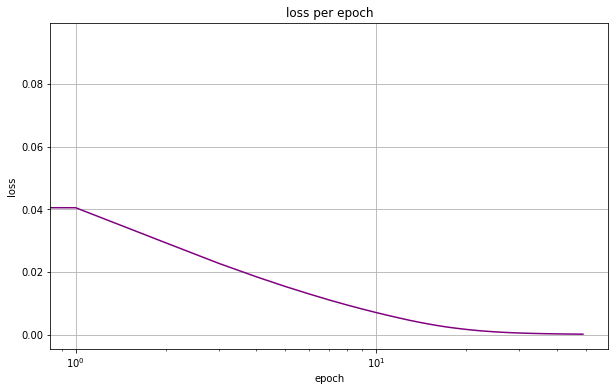

In [4]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.semilogx(history['epochs'], history['loss'], color='purple')
plt.show()

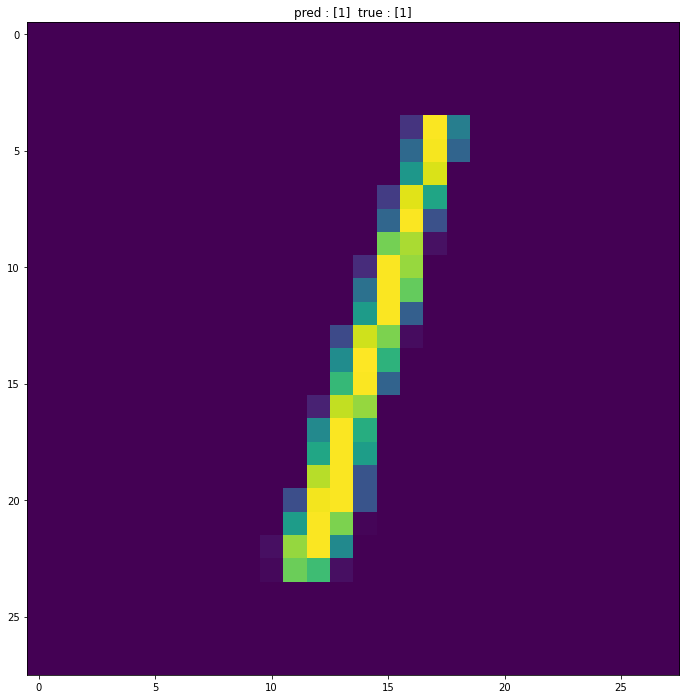

In [5]:
idx = 2

img = X_test[idx]
pred = np.argmax(model.forward(X_test[idx:idx+1]), axis=-1)
plt.figure(figsize=(15,12))
plt.title(f'pred : {str(pred)}  true : {str([y_test[idx]])}')
plt.imshow(img)
plt.show()

In [6]:
y_pred = model.forward(X_test)

y_idx = np.argmax(y_pred, axis=-1)
mask = np.equal(y_test, y_idx)
accuracy = sum(mask)/len(mask)

print(f'Accuracy on the test set : {accuracy}')

Accuracy on the test set : 0.9806
